In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import snook.data.blender as blender
import snook.data.generator as generator

In [2]:
RENDER_PATH = "test.png"
DATA_PATH = "test.txt"

In [3]:
blender.excomuniate_default_cube()

colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000167 sec)

	FBX import: Templates...
		Done (0.000086 sec)

	FBX import: Nodes...
		Done (0.000072 sec)

	FBX import: Connections...
		Done (0.000822 sec)

	FBX import: Meshes...
		Done (0.016491 sec)

	FBX import: Materials & Textures...
		Done (0.007600 sec)

	FBX import: Cameras & Lamps...
		Done (0.000796 sec)

	FBX import: Objects & Armatures...
		Done (0.000473 sec)

	FBX import: ShapeKeys...
		Done (0.000224 sec)

	FBX import: Animations...
		Done (0.000594 sec)

	FBX import: Assign materials...
		Done (0.000106 sec)

	FBX import: Assign textures...
		Done (0.005431 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000237 sec)

	Done (0.036276 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001384 sec)

	FBX import: Templates...
		Done (0.000050 sec)

	FBX import: Nodes...

FBX version: 7400
	FBX import: Prepare...
		Done (0.000785 sec)

	FBX import: Templates...
		Done (0.000399 sec)

	FBX import: Nodes...
		Done (0.000120 sec)

	FBX import: Connections...
		Done (0.000085 sec)

	FBX import: Meshes...
		Done (0.014875 sec)

	FBX import: Materials & Textures...
		Done (0.000637 sec)

	FBX import: Cameras & Lamps...
		Done (0.000114 sec)

	FBX import: Objects & Armatures...
		Done (0.000317 sec)

	FBX import: ShapeKeys...
		Done (0.000100 sec)

	FBX import: Animations...
		Done (0.000082 sec)

	FBX import: Assign materials...
		Done (0.000469 sec)

	FBX import: Assign textures...
		Done (0.000140 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000118 sec)

	Done (0.023661 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000456 sec)

	FBX import: Templates...
		Done (0.000086 sec)

	FBX import: Nodes...
		Done (0.000069 sec)

	FBX import: Connections...
		Done 

FBX version: 7400
	FBX import: Prepare...
		Done (0.000730 sec)

	FBX import: Templates...
		Done (0.000053 sec)

	FBX import: Nodes...
		Done (0.000081 sec)

	FBX import: Connections...
		Done (0.000213 sec)

	FBX import: Meshes...
		Done (10.594946 sec)

	FBX import: Materials & Textures...
		Done (0.002898 sec)

	FBX import: Cameras & Lamps...
		Done (0.000100 sec)

	FBX import: Objects & Armatures...
		Done (0.000329 sec)

	FBX import: ShapeKeys...
		Done (0.000050 sec)

	FBX import: Animations...
		Done (0.001218 sec)

	FBX import: Assign materials...
		Done (0.000880 sec)

	FBX import: Assign textures...
		Done (0.000087 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000065 sec)

	Done (11.180377 sec)

Import finished.


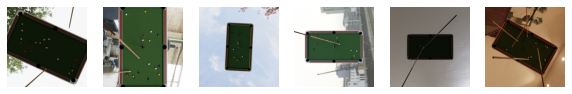

In [4]:
n = 6
plt.figure(figsize=(10, 8))
for i in tqdm(range(n)):
    scene.sample()
    scene.render(RENDER_PATH)
    
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
    plt.axis("off")
    
    os.remove(RENDER_PATH)
plt.show()

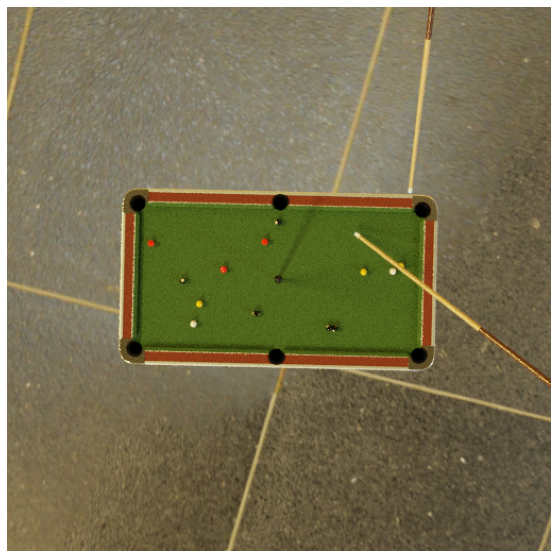

[24 balls] ndc_x ndc_y label
165 257 0
234 288 0
303 302 0
157 256 0
308 302 0
255 202 0
335 265 1
163 200 1
366 258 1
175 298 1
274 305 1
363 248 1
370 243 2
187 299 2
335 249 2
302 290 2
311 216 2
181 279 2
242 220 3
172 237 3
356 317 3
203 247 3
135 222 3
255 256 3

[6 cues] ndc_x ndc_y dir_x dir_y
379 175 -0.11804276704788208 0.9930084943771362
193 228 0.9871371388435364 -0.15987528860569
295 325 0.36897462606430054 -0.9294394850730896
327 212 -0.7925752401351929 -0.6097742319107056
342 362 -0.07611039280891418 -0.9970993995666504
255 256 0.99821937084198 -0.05964932590723038

[4 mask] ndc_x ndc_y
118 324
388 331
392 187
122 181



In [6]:
plt.figure(figsize=(10, 10))

scene.sample()
scene.render(RENDER_PATH)
scene.register(DATA_PATH)
    
plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
plt.axis("off")
plt.show()

with open(DATA_PATH, "r") as f:
    print(f.read())

os.remove(RENDER_PATH)
os.remove(DATA_PATH)